In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
data_path= '/content/drive/My Drive/INTERN_2022/DRUG/data/sensitivity_data/new_aug2/' 

In [4]:
# C and C' 

CCLE=pd.read_csv(data_path+'CCLE_paired_common.csv', index_col=0)
GDSC=pd.read_csv(data_path+'GDSC_paired_common.csv', index_col=0)

In [5]:
ccle_x = CCLE.iloc[:, 0:-1]
ccle_y = CCLE.iloc[:, -1]

In [6]:
GDSC = GDSC.reset_index()
GDSC = GDSC.drop(columns='index')

In [7]:
gdsc_x = GDSC.iloc[:, 0:-1]
gdsc_y = GDSC.iloc[:, -1]

In [8]:
gdsc_x.iloc[0:2, 0:-21]

,699,565,703,747,533,833,750,826,541,876,...,1192,1193,1194,1195,1196,1197,1198,1199,1200,1201
0,3.163645,6.002156,3.216832,7.628255,7.170792,6.155474,5.363246,7.56915,2.847797,3.213899,...,-1.816482,13.27105,11.715869,-2.953344,-8.512375,-3.749973,-6.475866,-6.030029,-12.977965,-0.488924
1,3.114602,5.657127,3.489439,9.050849,8.466160,5.654011,6.869779,5.83559,3.101927,3.574122,...,-1.816482,13.27105,11.715869,-2.953344,-8.512375,-3.749973,-6.475866,-6.030029,-12.977965,-0.488924


In [9]:
gdsc_x.iloc[:, 0:-21] = StandardScaler().fit_transform(gdsc_x.iloc[:, 0:-21])
ccle_x.iloc[:, 0:-21] = StandardScaler().fit_transform(ccle_x.iloc[:, 0:-21])


plot

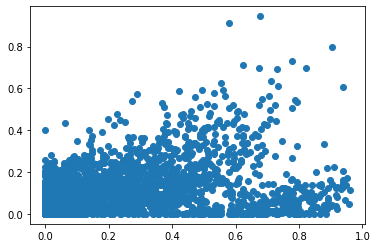

In [18]:
import matplotlib.pyplot as plt

plt.scatter(ccle_y, gdsc_y)
plt.show()



In [ ]:
from sklearn.model_selection import train_test_split

gdsc_X_train, gdsc_X_test, gdsc_y_train, gdsc_y_test = train_test_split(gdsc_x, gdsc_y, test_size = 0.30, random_state = 42) 
ccle_X_train, ccle_X_test, ccle_y_train, ccle_y_test = train_test_split(ccle_x, ccle_y,test_size = 0.30, random_state = 42)

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import plotly.express as px
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestRegressor

# Create linear regression object
# change to RandomForestRegressor() while needed 
m1 = linear_model.Ridge()
m2=  linear_model.Ridge()

In [ ]:
# in-study results: CCLE
m1.fit(ccle_X_train, ccle_y_train)

# Make predictions using the testing set
ccle_y_pred = m1.predict(ccle_X_test)


# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(ccle_y_test, ccle_y_pred))

#mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(ccle_y_test, ccle_y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(ccle_y_test, ccle_y_pred))

Mean squared error: 0.01
Mean absolute error: 0.07
Coefficient of determination: 0.76


In [ ]:
#mixed study results trained on CCLE (70%)

mixed_x_test = pd.concat([ccle_X_test, gdsc_X_test], ignore_index=True)
mixed_y_test = pd.concat([ccle_y_test, gdsc_y_test], ignore_index=True)

mixed_y_pred_m1 = m1.predict(mixed_x_test)

print("Mean squared error: %.2f" % mean_squared_error(mixed_y_test, mixed_y_pred_m1))

#mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(mixed_y_test, mixed_y_pred_m1))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(mixed_y_test, mixed_y_pred_m1))


Mean squared error: 0.03
Mean absolute error: 0.10
Coefficient of determination: 0.05


In [ ]:


#trained on gdsc 70% data , tested on 30% gdsc

m2.fit(gdsc_X_train, gdsc_y_train)

# Make predictions using the testing set
gdsc_y_pred = m2.predict(gdsc_X_test)

# The coefficients
#print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(gdsc_y_test, gdsc_y_pred))

#mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(gdsc_y_test, gdsc_y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(gdsc_y_test, gdsc_y_pred))

Mean squared error: 0.01
Mean absolute error: 0.06
Coefficient of determination: 0.17


In [ ]:
#mixed study results trained on gdsc (70%)

mixed_y_pred_m2 = m2.predict(mixed_x_test)

print("Mean squared error: %.2f" % mean_squared_error(mixed_y_test, mixed_y_pred_m2))

#mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(mixed_y_test, mixed_y_pred_m2))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(mixed_y_test, mixed_y_pred_m2))

Mean squared error: 0.03
Mean absolute error: 0.10
Coefficient of determination: 0.03


combined data

In [ ]:
#mixed model m5
#train on mixed dataset and test on mixed dataset

m5=  RandomForestRegressor(max_depth=4)#linear_model.Ridge()

mixed_x_train = pd.concat([ccle_X_train, gdsc_X_train], ignore_index=True)
mixed_y_train = pd.concat([ccle_y_train, gdsc_y_train], ignore_index=True)

m5.fit(mixed_x_train, mixed_y_train)

#make predictions on the combined test data

mixed_y_pred_m5 = m5.predict(mixed_x_test)   

print("Mean squared error: %.2f" % mean_squared_error(mixed_y_test, mixed_y_pred_m5))

#mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(mixed_y_test, mixed_y_pred_m5))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(mixed_y_test, mixed_y_pred_m5))


Mean squared error: 0.02
Mean absolute error: 0.09
Coefficient of determination: 0.43


In [ ]:
#predictions on training sets. m1 to predict CCLE and m2 to predict GDSC
ccle_y_train_pred = m1.predict(ccle_X_train)
gdsc_y_train_pred = m2.predict(gdsc_X_train)

best that can be done on training sets (don't need these

In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(gdsc_y_train, gdsc_y_train_pred))

#mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(gdsc_y_train, gdsc_y_train_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(gdsc_y_train, gdsc_y_train_pred))

Mean squared error: 0.01
Mean absolute error: 0.06
Coefficient of determination: 0.43


In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(ccle_y_train, ccle_y_train_pred))

#mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(ccle_y_train, ccle_y_train_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(ccle_y_train, ccle_y_train_pred))

Mean squared error: 0.01
Mean absolute error: 0.07
Coefficient of determination: 0.80


WA method

In [ ]:
avg_y_pred = (ccle_y_pred + gdsc_y_pred)/2

In [ ]:
avg_y_pred = pd.Series(avg_y_pred)

In [ ]:
#stack the avg_y_pred twice for CCLE and GDSC. first half of mixed_y_test comes from CCLE and the second half comes from GDSC
avg_y_pred_stacked = pd.concat([avg_y_pred, avg_y_pred], ignore_index=True)

In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(mixed_y_test, avg_y_pred_stacked))

#mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(mixed_y_test, avg_y_pred_stacked))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(mixed_y_test, avg_y_pred_stacked))

Mean squared error: 0.02
Mean absolute error: 0.09
Coefficient of determination: 0.36


# do a linear regression on the training scores for our own method

In [ ]:
m4 = linear_model.LinearRegression()

In [ ]:
#for m4, gdsc is the x and ccle is the y, reverse for m3
m4.fit(gdsc_y_train_pred.reshape(-1, 1), ccle_y_train_pred.reshape(-1,1))

# Make predictions using the testing set
ccle_y_pred_m4 = m4.predict(gdsc_y_pred.reshape(-1,1))

#avg ccle values predicted by m4 + gdsc input y values  to m4 
gdsc = (ccle_y_pred_m4 + gdsc_y_pred.reshape(-1,1))/2

#print(gdsc)
'''print("Mean squared error: %.2f" % mean_squared_error(gdsc_y_test, gdsc))

#mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(gdsc_y_test, gdsc))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(gdsc_y_test, gdsc))'''

Mean squared error: 0.01
Mean absolute error: 0.08
Coefficient of determination: -0.14


In [ ]:
m3 =linear_model.LinearRegression()

In [ ]:
#for m3, gdsc is the y and ccle is the x, reverse for m4
m3.fit(ccle_y_train_pred.reshape(-1, 1), gdsc_y_train_pred.reshape(-1,1))

# Make predictions using the testing set
gdsc_y_pred_m3 = m3.predict(ccle_y_pred.reshape(-1,1))

ccle = (gdsc_y_pred_m3 + ccle_y_pred.reshape(-1,1))/2
''''print("Mean squared error: %.2f" % mean_squared_error(ccle_y_test, ccle))

#mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(ccle_y_test, ccle))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(ccle_y_test, ccle))'''

Mean squared error: 0.02
Mean absolute error: 0.10
Coefficient of determination: 0.56


In [ ]:
#use squeeze to make it one dimensional
ccle = pd.Series(ccle.squeeze())
gdsc =pd.Series(gdsc.squeeze())

In [ ]:
#concat for comparing with mixed_y_test
concated = pd.concat([ccle, gdsc], ignore_index=True)

In [ ]:
#test on mixed data 

print("Mean squared error: %.2f" % mean_squared_error(mixed_y_test, concated))

#mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(mixed_y_test, concated))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(mixed_y_test, concated))

Mean squared error: 0.02
Mean absolute error: 0.09
Coefficient of determination: 0.48


cross (don't need)

In [ ]:
#baseline 

# Make predictions using the testing set
ccle_y_pred_m2 = m2.predict(ccle_X_test)
print("Mean squared error: %.2f" % mean_squared_error(ccle_y_test, ccle_y_pred_m2))

#mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(ccle_y_test, ccle_y_pred_m2))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(ccle_y_test, ccle_y_pred_m2))

Mean squared error: 0.05
Mean absolute error: 0.14
Coefficient of determination: -0.06


In [ ]:
#Baseline
# Make predictions using the testing set
gdsc_y_pred_m1 = m1.predict(gdsc_X_test)
print("Mean squared error: %.2f" % mean_squared_error(gdsc_y_test, gdsc_y_pred_m1))

#mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(gdsc_y_test, gdsc_y_pred_m1))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(gdsc_y_test, gdsc_y_pred_m1))

Mean squared error: 0.05
Mean absolute error: 0.14
Coefficient of determination: -4.80


In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(gdsc_y_test, ccle_y_pred))

#mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(gdsc_y_test, ccle_y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(gdsc_y_test, ccle_y_pred))

Mean squared error: 0.05
Mean absolute error: 0.14
Coefficient of determination: -4.70


In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(gdsc_y_test, ccle_y_pred_m3))

#mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(gdsc_y_test, ccle_y_pred_m3))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(gdsc_y_test, ccle_y_pred_m3))

Mean squared error: 0.02
Mean absolute error: 0.11
Coefficient of determination: -0.87
